<a href="https://colab.research.google.com/github/sandbox259/Sales-Analysis/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load datasets
orders_df = pd.read_csv("/content/List_of_Orders_55FFC79CF8.csv")
order_details_df = pd.read_csv("/content/Order_Details_19795F61CF.csv")
sales_target_df = pd.read_csv("/content/Sales_target_DD2E9B96A0.csv")

In [4]:
# Merge datasets on 'Order ID'
merged_df = pd.merge(order_details_df, orders_df, on="Order ID")
merged_df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25601,66.0,-12.0,5,Clothing,Stole,01-04-2018,Bharat,Gujarat,Ahmedabad
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,01-04-2018,Bharat,Gujarat,Ahmedabad
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,01-04-2018,Bharat,Gujarat,Ahmedabad
4,B-25602,168.0,-111.0,2,Electronics,Phones,01-04-2018,Pearl,Maharashtra,Pune


In [6]:
# Total Sales per Category
total_sales = merged_df.groupby("Category")["Amount"].sum().reset_index()


In [11]:
# Average Profit per Order and Profit Margin
profit_analysis = merged_df.groupby("Category").agg({"Profit": ["sum", "mean"], "Amount": "sum"})
profit_analysis["Profit Margin"] = (profit_analysis.loc[:, ("Profit", "sum")] / profit_analysis.loc[:, ("Amount", "sum")]) * 100
profit_analysis = profit_analysis.reset_index()

In [12]:
# Identify top-performing and underperforming categories
top_category = profit_analysis.sort_values(by=("Profit", "sum"), ascending=False).iloc[0]
underperforming_category = profit_analysis.sort_values(by=("Profit", "sum"), ascending=True).iloc[0]


In [13]:
# Calculate Month-over-Month Percentage Change in Furniture Sales Target
sales_target_df["Previous Target"] = sales_target_df[sales_target_df["Category"] == "Furniture"]["Target"].shift(1)
sales_target_df["Percentage Change"] = ((sales_target_df["Target"] - sales_target_df["Previous Target"]) / sales_target_df["Previous Target"]) * 100


In [14]:
# Identify significant fluctuations
significant_fluctuations = sales_target_df[sales_target_df["Percentage Change"].abs() > 5]  # Assuming >5% is significant

In [15]:
# Top 5 states with highest order count
top_states = orders_df["State"].value_counts().head(5)

In [16]:
# Total Sales and Average Profit per Top State
top_states_sales_profit = merged_df[merged_df["State"].isin(top_states.index)].groupby("State").agg({"Amount": "sum", "Profit": "mean"}).reset_index()


<ipython-input-17-0355b47a89ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_sales["Category"], y=total_sales["Amount"], palette="viridis")


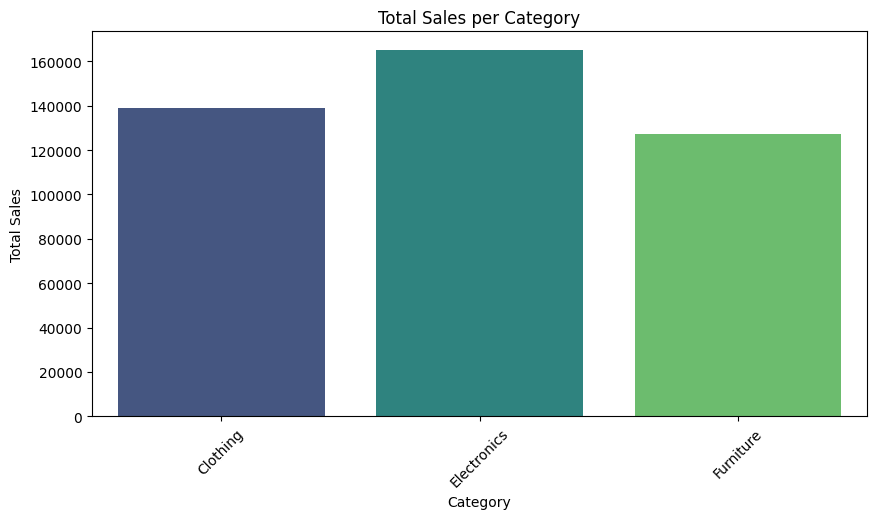

In [17]:
# Sales per Category
plt.figure(figsize=(10, 5))
sns.barplot(x=total_sales["Category"], y=total_sales["Amount"], palette="viridis")
plt.title("Total Sales per Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()